In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Classroom/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Classroom/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Classroom/Transactions.csv")


In [21]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [22]:
# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# **EDA**

In [23]:
# 1. Number of unique customers, products, and transactions
print(f"Unique Customers: {customers['CustomerID'].nunique()}")
print(f"Unique Products: {products['ProductID'].nunique()}")
print(f"Total Transactions: {transactions['TransactionID'].nunique()}")

Unique Customers: 200
Unique Products: 100
Total Transactions: 1000


In [24]:
# 2. Top 5 customers by transaction value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by TotalValue:\n", top_customers)

Top 5 Customers by TotalValue:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [25]:
# 3. Top-selling products by quantity
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Quantity Sold:\n", top_products)

Top 5 Products by Quantity Sold:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [26]:
# 4. Revenue contribution by category
merged = transactions.merge(products, on='ProductID', how='left')
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Category:\n", category_revenue)

Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [27]:
# 5. Transactions by Region
region_transactions = customers.merge(transactions, on='CustomerID', how='left').groupby('Region')['TransactionID'].count()
print("Transactions by Region:\n", region_transactions)

Transactions by Region:
 Region
Asia             218
Europe           234
North America    244
South America    304
Name: TransactionID, dtype: int64


# **Visualizations**

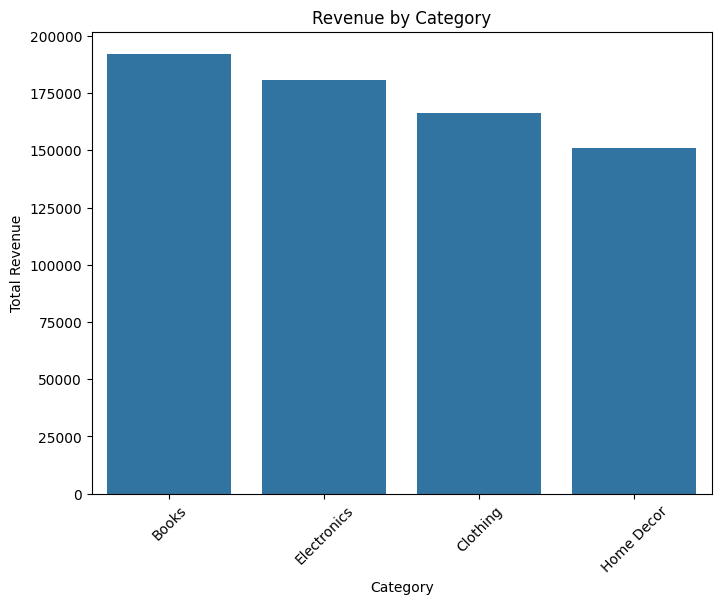

In [28]:
# 1. Revenue by category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Category")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.show()

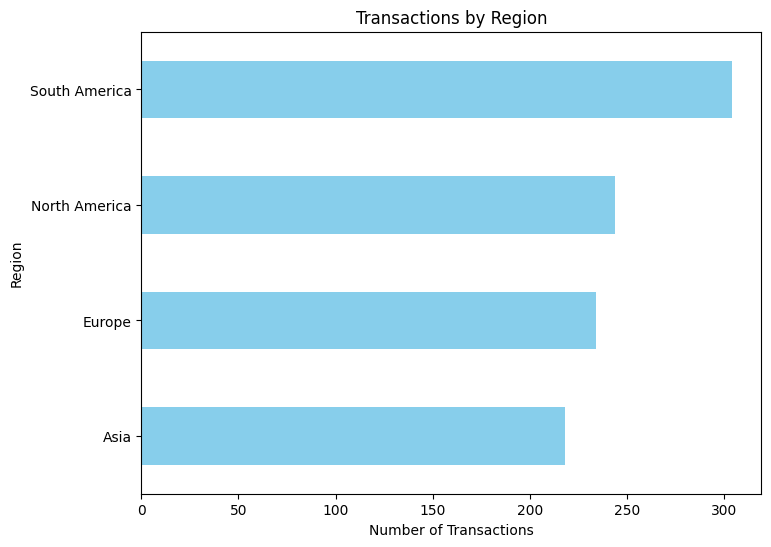

In [29]:
# 2. Transactions by region
plt.figure(figsize=(8, 6))
region_transactions.sort_values().plot(kind='barh', color='skyblue')
plt.title("Transactions by Region")
plt.xlabel("Number of Transactions")
plt.show()